In [1]:
apikey = "ZJur02XRdgXhA37MaCxp9Bl3gpb9ZHc9tkWzVb3jFNCtpyHS5u6UrWqqYpm95igF"
secretkey = "lb3kBwZgAG78N9mVJzCuF7E6OUcqgDI8zU97vzGBnSW957heUKkwG55tcNOPZnOM"

In [2]:
!pip install python-binance

In [21]:
!pip install mplfinance

In [31]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
from datetime import datetime as dt
import datetime
from dateutil.relativedelta import relativedelta
import mplfinance as mpf
import warnings
warnings.filterwarnings('ignore')

In [4]:
client = Client(apikey,secretkey)

In [5]:
tickers = client.get_all_tickers()

In [7]:
len(tickers)

2101

In [8]:
client.get_historical_klines??

Signature:
client.get_historical_klines(
    symbol,
    interval,
    start_str=None,
    end_str=None,
    limit=1000,
    klines_type: binance.enums.HistoricalKlinesType = <HistoricalKlinesType.SPOT: 1>,
)
Source:   
    def get_historical_klines(self, symbol, interval, start_str=None, end_str=None, limit=1000,
                              klines_type: HistoricalKlinesType = HistoricalKlinesType.SPOT):
        """Get Historical Klines from Binance

        :param symbol: Name of symbol pair e.g BNBBTC
        :type symbol: str
        :param interval: Binance Kline interval
        :type interval: str
        :param start_str: optional - start date string in UTC format or timestamp in milliseconds
        :type start_str: str|int
        :param end_str: optional - end date string in UTC format or timestamp in milliseconds (default will fetch everything up to now)
        :type end_str: str|int
        :param limit: Default 1000; max 1000.
        :type limit: int
        :param kli

In [11]:
historical = client.get_historical_klines('BTCBUSD', Client.KLINE_INTERVAL_1DAY, start_str=str(dt.now(datetime.timezone.utc)-relativedelta(years=2)),end_str=str(dt.now(datetime.timezone.utc)))

In [13]:
len(historical)

730

In [ ]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

In [15]:
df_btc = pd.DataFrame(historical, columns=['open_time','open','high','low','close','volume','close_time','quote_asset_volume','number_of_trades','taker_buy_base_asset_volume','taker_buy_quote_asset_volume','ignore'])
df_btc.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1601078400000,10691.01000000,10824.16000000,10651.00000000,10729.62000000,3123.75103900,1601164799999,33485992.97371167,134565,1524.77906600,16347482.46135002,0
1,1601164800000,10729.73000000,10799.99000000,10593.72000000,10774.39000000,3304.17015500,1601251199999,35387308.75447959,125857,1612.62367300,17269934.19842842,0
2,1601251200000,10773.91000000,10954.81000000,10630.47000000,10692.83000000,5812.00892800,1601337599999,63108903.64817526,176113,2884.12139600,31322113.70245747,0
3,1601337600000,10692.61000000,10863.62000000,10635.72000000,10839.10000000,5235.69288400,1601423999999,56157915.93370599,144203,2737.29810700,29357052.00166041,0
4,1601424000000,10839.08000000,10847.62000000,10661.54000000,10775.29000000,5494.34425000,1601510399999,58968124.52472847,144432,2634.97427800,28277598.77838293,0


In [16]:
df_btc['open_time'] = pd.to_datetime(df_btc['open_time']/1000, unit='s')
df_btc['close_time'] = pd.to_datetime(df_btc['close_time']/1000, unit='s')
df_btc.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-09-26,10691.01000000,10824.16000000,10651.00000000,10729.62000000,3123.75103900,2020-09-26 23:59:59.999000064,33485992.97371167,134565,1524.77906600,16347482.46135002,0
1,2020-09-27,10729.73000000,10799.99000000,10593.72000000,10774.39000000,3304.17015500,2020-09-27 23:59:59.999000064,35387308.75447959,125857,1612.62367300,17269934.19842842,0
2,2020-09-28,10773.91000000,10954.81000000,10630.47000000,10692.83000000,5812.00892800,2020-09-28 23:59:59.999000064,63108903.64817526,176113,2884.12139600,31322113.70245747,0
3,2020-09-29,10692.61000000,10863.62000000,10635.72000000,10839.10000000,5235.69288400,2020-09-29 23:59:59.999000064,56157915.93370599,144203,2737.29810700,29357052.00166041,0
4,2020-09-30,10839.08000000,10847.62000000,10661.54000000,10775.29000000,5494.34425000,2020-09-30 23:59:59.999000064,58968124.52472847,144432,2634.97427800,28277598.77838293,0


In [17]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   open_time                     730 non-null    datetime64[ns]
 1   open                          730 non-null    object        
 2   high                          730 non-null    object        
 3   low                           730 non-null    object        
 4   close                         730 non-null    object        
 5   volume                        730 non-null    object        
 6   close_time                    730 non-null    datetime64[ns]
 7   quote_asset_volume            730 non-null    object        
 8   number_of_trades              730 non-null    int64         
 9   taker_buy_base_asset_volume   730 non-null    object        
 10  taker_buy_quote_asset_volume  730 non-null    object        
 11  ignore                        73

In [18]:
numeric_columns = ['open', 'high','low','close','volume','quote_asset_volume','taker_buy_base_asset_volume','taker_buy_quote_asset_volume']

In [19]:
df_btc[numeric_columns] = df_btc[numeric_columns].apply(pd.to_numeric, axis=1)
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   open_time                     730 non-null    datetime64[ns]
 1   open                          730 non-null    float64       
 2   high                          730 non-null    float64       
 3   low                           730 non-null    float64       
 4   close                         730 non-null    float64       
 5   volume                        730 non-null    float64       
 6   close_time                    730 non-null    datetime64[ns]
 7   quote_asset_volume            730 non-null    float64       
 8   number_of_trades              730 non-null    int64         
 9   taker_buy_base_asset_volume   730 non-null    float64       
 10  taker_buy_quote_asset_volume  730 non-null    float64       
 11  ignore                        73

In [20]:
df_btc.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2020-09-26,10691.01,10824.16,10651.00,10729.62,3123.751039,2020-09-26 23:59:59.999000064,3.348599e+07,134565,1524.779066,1.634748e+07,0
1,2020-09-27,10729.73,10799.99,10593.72,10774.39,3304.170155,2020-09-27 23:59:59.999000064,3.538731e+07,125857,1612.623673,1.726993e+07,0
2,2020-09-28,10773.91,10954.81,10630.47,10692.83,5812.008928,2020-09-28 23:59:59.999000064,6.310890e+07,176113,2884.121396,3.132211e+07,0
3,2020-09-29,10692.61,10863.62,10635.72,10839.10,5235.692884,2020-09-29 23:59:59.999000064,5.615792e+07,144203,2737.298107,2.935705e+07,0
4,2020-09-30,10839.08,10847.62,10661.54,10775.29,5494.344250,2020-09-30 23:59:59.999000064,5.896812e+07,144432,2634.974278,2.827760e+07,0


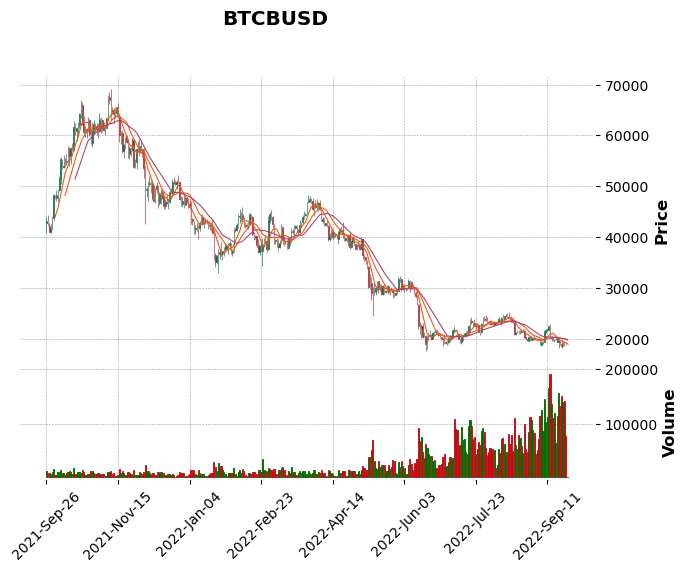

In [33]:
mpf.plot(df_btc.set_index('close_time').tail(365), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCBUSD', 
        mav=(7,14,21))